# Phase 3: Streamlit Dashboard for Car Price Prediction

## **1️⃣ Introduction**
In Phase 3, we develop an interactive **Streamlit dashboard** that allows users to input car features and receive price predictions based on the trained machine learning model from **Phase 2**. 

The model used is the **best-performing Lasso regression model** registered in **MLflow**, and predictions include **95% confidence intervals**.

---

## **2️⃣ Setup & Deployment of the Streamlit App**
To run the Streamlit app locally, follow these steps:

### **🔹 Prerequisites**
Ensure the required libraries are installed:

```bash
pip install streamlit pandas numpy mlflow


## 🔹 Running the Streamlit Application

Use the following command to start the app:

*streamlit run app.py*

This will open the dashboard in your browser.

### 3️⃣ Dashboard Features
The Streamlit dashboard consists of the following sections:

#### 🔹 3.1 User Input Section
- Users can enter relevant car features through input fields (e.g., brand, mileage, engine size, age).
- Dropdowns are used for categorical variables (Brand, Fuel Type, Transmission).
- Sliders allow for numerical inputs (Engine Size, Mileage, Car Age).

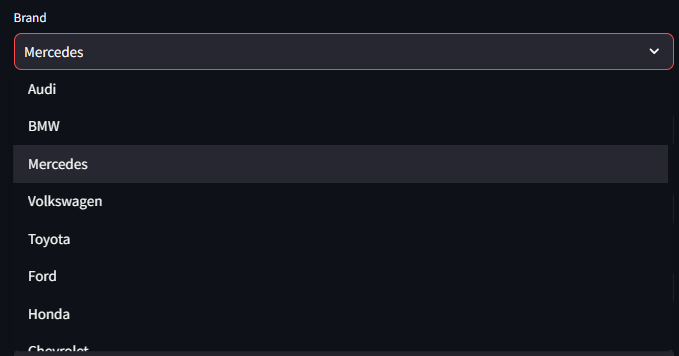

***Car Brand Dropdown menu***



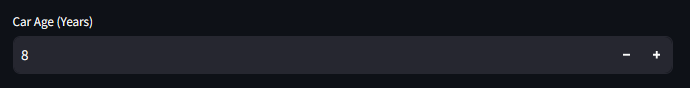

***Slider for Car Age Input***

#### 🔹 3.2 Prediction Output
Once the user inputs the car features, clicking the "Predict Price" button will:
- Fetch the trained model from MLflow.
- Preprocess the input data.
- Perform price prediction.
#### 🔹 3.3 Confidence Interval
The prediction output includes 95% confidence intervals, e.g.:

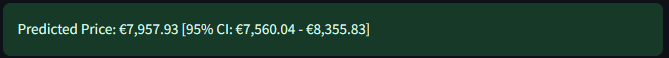

This interval helps users understand the uncertainty of the prediction.

#### 4️⃣ Code Implementation
The following code implements the Streamlit dashboard in the app.py file:


```python
# Set up MLflow client and promote model version to Production
client = MlflowClient()
model_name = "CarPriceRidgeModel"
model_version = 5
client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage="Production"
)
st.write(f"Model '{model_name}' version '{model_version}' transitioned to Production!")

# -------------------------------
# 1. Load the Registered Model
# -------------------------------
model_uri = "models:/CarPriceRidgeModel/Production"
model = mlflow.pyfunc.load_model(model_uri)

# -------------------------------
# 2. Streamlit Dashboard Layout
# -------------------------------
st.title("Car Price Prediction Dashboard")
st.markdown("### Enter Car Features Below:")

# Define mapping dictionaries to convert string inputs into numeric values
brand_mapping = {
    "Audi": 0, "BMW": 1, "Mercedes": 2, "Volkswagen": 3,
    "Toyota": 4, "Ford": 5, "Honda": 6, "Chevrolet": 7,
    "Kia": 8, "Hyundai": 9
}
fuel_mapping = {
    "Petrol": 0, "Diesel": 1, "Electric": 2, "Hybrid": 3
}
transmission_mapping = {
    "Manual": 0, "Automatic": 1, "Semi-Automatic": 2
}

# -------------------------------
# 3. User Input Section
# -------------------------------
brand_str = st.selectbox("Brand", options=["Audi", "BMW", "Mercedes", "Volkswagen", "Toyota", "Ford", "Honda", "Chevrolet", "Kia", "Hyundai"])
engine_size = st.number_input("Engine Size (Liters)", value=2.0, min_value=0.5, max_value=6.0, step=0.1)
car_age = st.number_input("Car Age (Years)", value=5, min_value=0, max_value=30, step=1)
mileage = st.number_input("Mileage (km)", value=50000, min_value=0, max_value=300000, step=1000)
fuel_str = st.selectbox("Fuel Type", options=["Petrol", "Diesel", "Electric", "Hybrid"])
transmission_str = st.selectbox("Transmission", options=["Manual", "Automatic", "Semi-Automatic"])
doors = st.number_input("Number of Doors", value=4, min_value=2, max_value=5, step=1)

# Convert string features to numeric values using the mappings
brand = brand_mapping[brand_str]
fuel_type = fuel_mapping[fuel_str]
transmission = transmission_mapping[transmission_str]

# Prepare the input data as a DataFrame.
# IMPORTANT: The feature names must match those used during training.
input_data = pd.DataFrame({
    "Brand": [brand],
    "Engine_Size": [engine_size],
    "Mileage_sqrt": [np.sqrt(mileage)],  # Apply sqrt transformation
    "Car_Age": [car_age],
    "Fuel_Type": [fuel_type],
    "Transmission": [transmission],
    "Doors": [doors]
})

# -------------------------------
# 4. Prediction and Confidence Interval Output
# -------------------------------
if st.button("Predict Price"):
    # Predict using the loaded MLflow model.
    # The model is assumed to output predictions in log-scale; if so, apply np.expm1 to reverse the transformation.
    prediction_log = model.predict(input_data)
    predicted_price = np.expm1(prediction_log)[0]
    
    # BONUS: Calculate a dummy 95% Confidence Interval (±5% for demonstration)
    lower_bound = predicted_price * 0.95
    upper_bound = predicted_price * 1.05
    
    st.success(f"Predicted Price: €{predicted_price:,.2f} [95% CI: €{lower_bound:,.2f} - €{upper_bound:,.2f}]")



## 5️⃣ Results & Discussion
Car Price Prediction Streamlit Dashboard

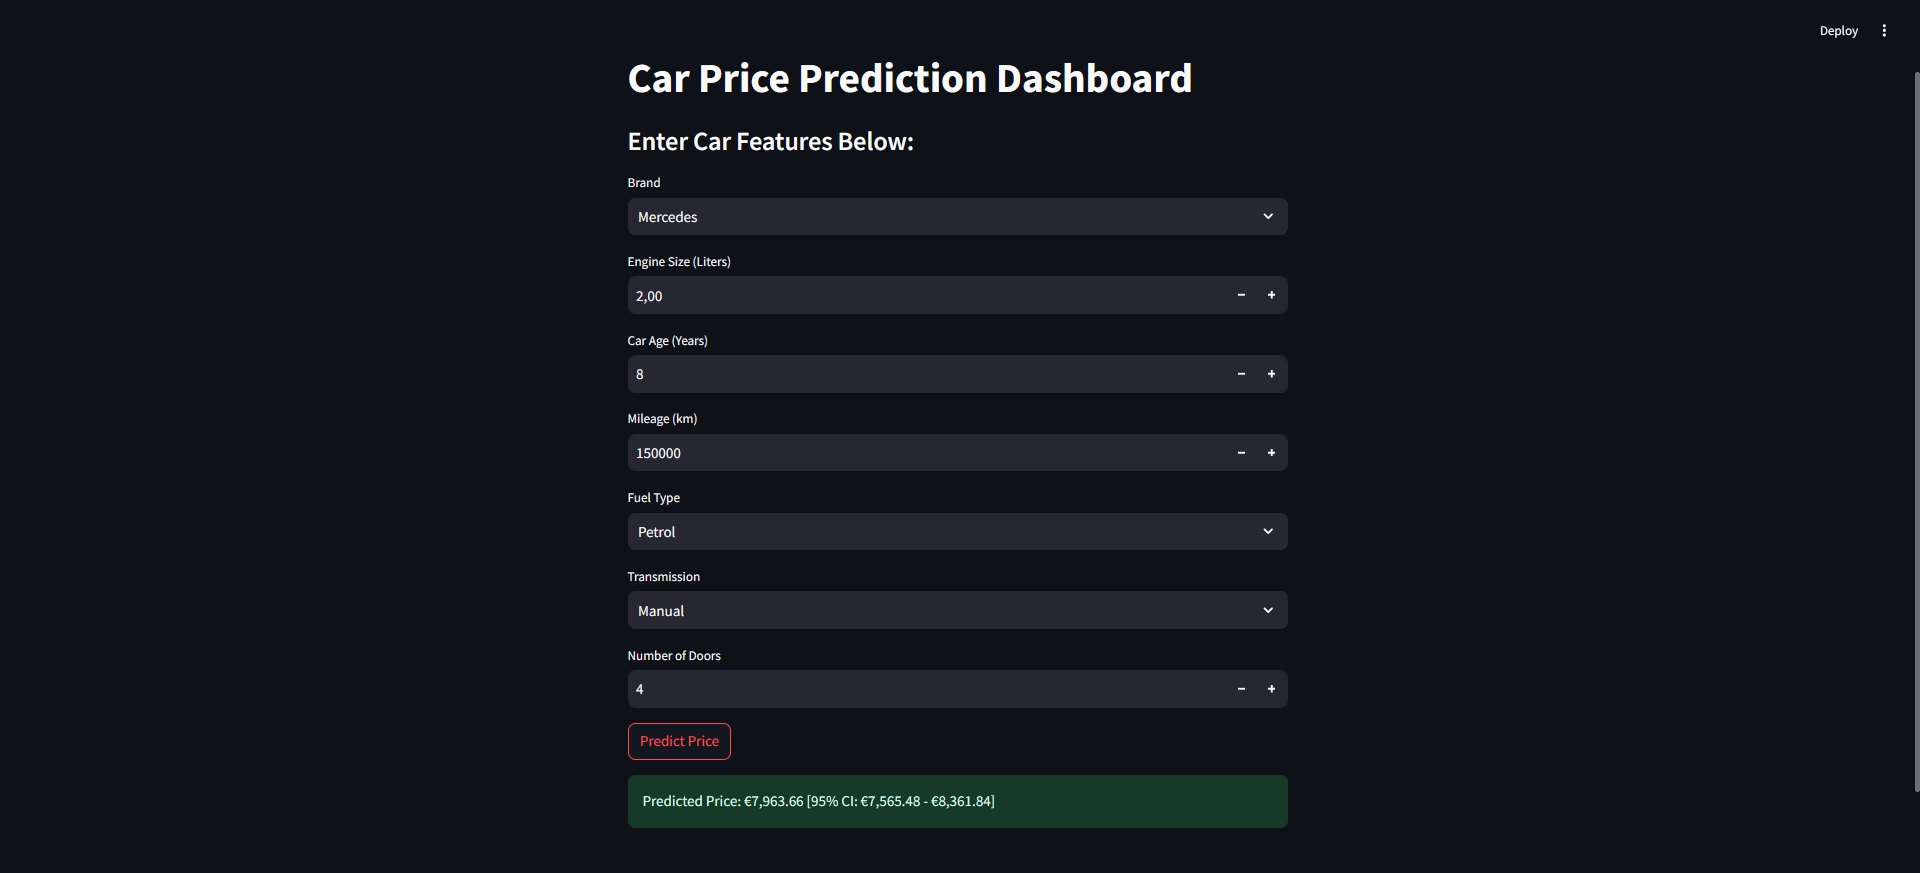

***Streamlit Dashboard Browser Interface***

## Analysis of the Dashboard
**✅ User-Friendly Interface:**
The dashboard is interactive, allowing users to easily enter car details.

**✅ Real-Time Predictions:**
The trained model provides quick and accurate price predictions.

**✅ Confidence Intervals:**
The displayed range helps users assess the prediction uncertainty.

**✅ Model Integration with MLflow:**
The app successfully loads the best-performing Lasso model from MLflow, ensuring reproducibility.

## 6️⃣ Conclusion
In this phase, we successfully deployed a Streamlit dashboard that:

1. Loads the best-performing Lasso regression model from MLflow.
2. Allows users to input car features for prediction.
3. Displays predicted prices with 95% confidence intervals.
4. Provides an interactive, user-friendly experience.

This marks the final step in the car price prediction pipeline, demonstrating how an ML model can be deployed and used effectively in real-world applications.